<a 
href="https://colab.research.google.com/github/wingated/cs474_labs_f2019/blob/master/DL_Lab6.ipynb"
  target="_parent">
  <img
    src="https://colab.research.google.com/assets/colab-badge.svg"
    alt="Open In Colab"/>
</a>

# Lab 6: Sequence-to-sequence models

### Description:
For this lab, you will code up the [char-rnn model of Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). This is a recurrent neural network that is trained probabilistically on sequences of characters, and that can then be used to sample new sequences that are like the original.

This lab will help you develop several new skills, as well as understand some best practices needed for building large models. In addition, we'll be able to create networks that generate neat text!

### Deliverable:
- Fill in the code for the RNN (using PyTorch's built-in GRU).
- Fill in the training loop
- Fill in the evaluation loop. In this loop, rather than using a validation set, you will sample text from the RNN.
- Implement your own GRU cell.
- Train your RNN on a new domain of text (Star Wars, political speeches, etc. - have fun!)

### Grading Standards:
- 20% Implementation the RNN
- 20% Implementation training loop
- 20% Implementation of evaluation loop
- 20% Implementation of your own GRU cell
- 20% Training of your RNN on a domain of your choice

### Tips:
- Read through all the helper functions, run them, and make sure you understand what they are doing
- At each stage, ask yourself: What should the dimensions of this tensor be? Should its data type be float or int? (int is called `long` in PyTorch)
- Don't apply a softmax inside the RNN if you are using an nn.CrossEntropyLoss (this module already applies a softmax to its input).

### Example Output:
An example of my final samples are shown below (more detail in the
final section of this writeup), after 150 passes through the data.
Please generate about 15 samples for each dataset.

<code>
And ifte thin forgision forward thene over up to a fear not your
And freitions, which is great God. Behold these are the loss sub
And ache with the Lord hath bloes, which was done to the holy Gr
And appeicis arm vinimonahites strong in name, to doth piseling 
And miniquithers these words, he commanded order not; neither sa
And min for many would happine even to the earth, to said unto m
And mie first be traditions? Behold, you, because it was a sound
And from tike ended the Lamanites had administered, and I say bi
</code>


---

## Part 0: Readings, data loading, and high level training

---

There is a tutorial here that will help build out scaffolding code, and get an understanding of using sequences in pytorch.

* Read the following

> * [Pytorch sequence-to-sequence tutorial](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html) (Take note that you will not be implementing the encoder part of this tutorial.)
* [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)






In [1]:
! wget -O ./text_files.tar.gz 'https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz' 
! tar -xzf text_files.tar.gz
! pip install unidecode
! pip install torch

import unidecode
import string
import random
import re
 
import pdb
 
all_characters = string.printable
n_characters = len(all_characters)
file = unidecode.unidecode(open('./text_files/lotr.txt').read())
file_len = len(file)
print('file_len =', file_len)

--2020-02-14 17:03:48--  https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz
Resolving piazza.com (piazza.com)... 52.4.91.75, 34.192.194.48, 34.237.183.157, ...
Connecting to piazza.com (piazza.com)|52.4.91.75|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://d1b10bmlvqabco.cloudfront.net/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz [following]
--2020-02-14 17:03:48--  https://d1b10bmlvqabco.cloudfront.net/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz
Resolving d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)... 13.35.112.107, 13.35.112.59, 13.35.112.222, ...
Connecting to d1b10bmlvqabco.cloudfront.net (d1b10bmlvqabco.cloudfront.net)|13.35.112.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1533290 (1.5M) [application/x-gzip]
Saving to: ‘./text_files.tar.gz’

./text_files.tar.gz 100%[===

In [2]:
chunk_len = 200
 
def random_chunk():
  start_index = random.randint(0, file_len - chunk_len)
  end_index = start_index + chunk_len + 1
  return file[start_index:end_index]
  
print(random_chunk())

n the top they found, as Strider had said, a wide ring of ancient 
stonework, now crumbling or covered with age-long grass. But in the centre a 
cairn of broken stones had been piled. They were blacken


In [3]:
import torch
# Turn string into list of longs
def char_tensor(string):
  tensor = torch.zeros(len(string)).long()
  for c in range(len(string)):
      tensor[c] = all_characters.index(string[c])
  return tensor

print(char_tensor('abcDEF'))

tensor([10, 11, 12, 39, 40, 41])


---

## Part 4: Creating your own GRU cell 

**(Come back to this later - its defined here so that the GRU will be defined before it is used)**

---

The cell that you used in Part 1 was a pre-defined Pytorch layer. Now, write your own GRU class using the same parameters as the built-in Pytorch class does.

Please try not to look at the GRU cell definition. The answer is right there in the code, and in theory, you could just cut-and-paste it. This bit is on your honor!

**TODO:**
* Create a custom GRU cell

**DONE:**



In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class GRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(GRU, self).__init__()
    self.W_ir = nn.Linear(input_size, hidden_size)
    self.W_hr = nn.Linear(hidden_size, hidden_size)
    self.W_iz = nn.Linear(input_size, hidden_size)
    self.W_hz = nn.Linear(hidden_size, hidden_size)
    self.W_in = nn.Linear(input_size, hidden_size)
    self.W_hn = nn.Linear(hidden_size, hidden_size)
  
  def forward(self, inputs, hidden):
    r_t = torch.nn.functional.sigmoid(self.W_ir(inputs) + self.W_hr(hidden))
    z_t = torch.nn.functional.sigmoid(self.W_iz(inputs) + self.W_hz(hidden))
    n_t = torch.nn.functional.tanh(self.W_in(inputs) + (r_t*(self.W_hn(hidden))))
    hidden = ((1 - z_t)*n_t) + (z_t*hidden)
    output = hidden
    # Each layer does the following:
    # r_t = sigmoid(W_ir*x_t + b_ir + W_hr*h_(t-1) + b_hr)
    # z_t = sigmoid(W_iz*x_t + b_iz + W_hz*h_(t-1) + b_hz)
    # n_t = tanh(W_in*x_t + b_in + r_t**(W_hn*h_(t-1) + b_hn))
    # h_(t) = (1 - z_t)**n_t + z_t**h_(t-1)
    # Where ** is hadamard product (not matrix multiplication, but elementwise multiplication)
    
    return output, hidden
  


---

##  Part 1: Building a sequence to sequence model

---

Great! We have the data in a useable form. We can switch out which text file we are reading from, and trying to simulate.

We now want to build out an RNN model, in this section, we will use all built in Pytorch pieces when building our RNN class.


**TODO:**
* Create an RNN class that extends from nn.Module.

**DONE:**



In [0]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, n_layers=1):
    super(RNN, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.n_layers = n_layers

    self.embedding = nn.Embedding(output_size, hidden_size)
    self.gru = nn.GRU(hidden_size, hidden_size)
    # self.gru = GRU(hidden_size, hidden_size, n_layers)
    self.out = nn.Linear(hidden_size, output_size)
    # more stuff here...

  def forward(self, input_char, hidden):
    # by reviewing the documentation, construct a forward function that properly uses the output
    # of the GRU
    # stuff here
    # pdb.set_trace()
    output = self.embedding(input_char).view(1, 1, -1)
    #pdb.set_trace()
    output = F.relu(output)
    output, hidden = self.gru(output, hidden)
    output = self.out(output)
    return output, hidden
    
  def init_hidden(self):
    return torch.zeros(self.n_layers, 1, self.hidden_size)

In [0]:
def random_training_set():    
  chunk = random_chunk()
  inp = char_tensor(chunk[:-1])
  target = char_tensor(chunk[1:])
  return inp, target

---

## Part 2: Sample text and Training information

---

We now want to be able to train our network, and sample text after training.

This function outlines how training a sequence style network goes. 

**TODO:**
* Fill in the pieces.

**DONE:**




In [0]:


def train(inp, target):
  ## initialize hidden layers, set up gradient and loss 
    # your code here
  ## /

  decoder_optimizer.zero_grad()
  hidden = decoder.init_hidden()
  loss = 0

  #pdb.set_trace()
  for di in range(inp.size(0)):
    output, hidden = decoder(inp[di], hidden)
    # pdb.set_trace()
    myTarget = target[di].unsqueeze(0)
    myOutput = output.squeeze(0)
    # pdb.set_trace()
    loss += criterion(myOutput, myTarget)

  loss.backward()
  decoder_optimizer.step()

  return loss.item() / inp.size(0)

    
  # more stuff here...

---

## Part 3: Sample text and Training information

---

You can at this time, if you choose, also write out your train loop boilerplate that samples random sequences and trains your RNN. This will be helpful to have working before writing your own GRU class.

If you are finished training, or during training, and you want to sample from the network you may consider using the following function. If your RNN model is instantiated as `decoder`then this will probabilistically sample a sequence of length `predict_len`

**TODO:**
* Fill out the evaluate function to generate text frome a primed string

**DONE:**



In [0]:
def sample_outputs(output, temp):
    """Takes in a vector of unnormalized probability weights and samples a character from the distribution"""
    T = temp
    return torch.multinomial(torch.exp(output) / T, 1)

def evaluate(prime_str='A', predict_len=100, temperature=0.8):
  ## initialize hidden state, initialize other useful variables
    # your code here
  ## /
  ans = ""
  with torch.no_grad():
    hidden = decoder.init_hidden()
    ans += prime_str

    for char in prime_str:
      output, hidden = decoder(char_tensor(char), hidden)

    for i in range(predict_len):
      output, hidden = decoder(char_tensor(ans[-1]), hidden)
      next_char = all_characters[sample_outputs(output.squeeze(0), temperature)]
      ans += next_char

  return ans


---

## Part 4: (Create a GRU cell, requirements above)

---



---

## Part 5: Run it and generate some text!

---

Assuming everything has gone well, you should be able to run the main function in the scaffold code, using either your custom GRU cell or the built in layer, and see output something like this. I trained on the “lotr.txt” dataset, using chunk_length=200, hidden_size=100 for 2000 epochs gave.

**TODO:** 
* Create some cool output

**DONE:**



In [0]:
import time
n_epochs = 5000
print_every = 500
plot_every = 100
hidden_size = 200
n_layers = 1
lr = 0.001
 
decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

inp, target = random_training_set()
start = time.time()
all_losses = []
loss_avg = 0

In [10]:
# n_epochs = 2000
for epoch in range(1, n_epochs + 1):
  loss_ = train(*random_training_set())       
  loss_avg += loss_

  if epoch % print_every == 0:
      print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, loss_))
      print(evaluate('Wh', 100), '\n')

  if epoch % plot_every == 0:
      all_losses.append(loss_avg / plot_every)
      loss_avg = 0

[160.0490756034851 (500 10%) 2.1265]
Why. 

'Af on 
hady bis the marnted the qouly fo thele roce fordire the brincly bcougs the bear piderd 

[315.1375916004181 (1000 20%) 1.7720]
Wher been sevend beach wour Plagh Sarwal. But betras!' Sam 
him, I drond, and agoned brayderid 
goomby 

[470.18575286865234 (1500 30%) 1.6771]
Whed or 
coult, yet was fell a 
not firetherth, It willoming frodo'le werey; and mind!' he wearing Sal 

[624.9832427501678 (2000 40%) 1.6129]
Whilly 
off the Strunk 
benoth an - thre ca. 

'Not with he said,' said AromoFs of I knove and been al 

[780.3138167858124 (2500 50%) 1.7916]
Whel,' said Sam, 
slven only all Frodo he 
am in the hidge 
tye,; agains endalf of your frum of mide.' 

[934.9903318881989 (3000 60%) 1.4160]
Wh at them se maskned feltient I but hanging to to say took for him,' said Ly he have see nigst. The t 

[1090.3390100002289 (3500 70%) 1.7008]
Whelly, river of If was brough the dark and all. 

It ham dogevay the Men leam the know. I kon were yo 

In [12]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " I ", " ca", " G", " lo", " ra"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
#   all_characters.index(string[c])
  print(evaluate(start_strings[start], 200), '\n')

 he
 hed and keep about finely as I'm clan-sweet 
to the king, 
year trusted with the Fite. Not alsifold- and there nouthold 
vises he could deep tur and went of roavest night to he. 

Slat beyond in from th 

 I 
 I on othent 
twell, 
eybelged down dievented that he fend older their care for 
out, I don't did never you was pangrent hard. 

'Never 
any sing Placoin was ranging upon the Sensat. They shall now steng 

 I 
 I would say, should me how even with his 



walkness dour!' Gandalf on Pippin those f(S, in a 
many namelt; and have no for age before the purkee of 
then redious 
Nartting was lanst entrish. Therery 
 

 he
 hed, as we 
lang Lord on a rim 
it have deep darkness he wonder; Gondot thus he sleef the City, though Shjoded that he nerry he ramselfached uncest the Smove Hord have been wath faight of the 



glever 

 I 
 I mon on fine to exile stase, 
to hand was son't blance 

which 
though 
their men the Woomer have am our wark will of Buridly. 'Aftrying Past the bound. T

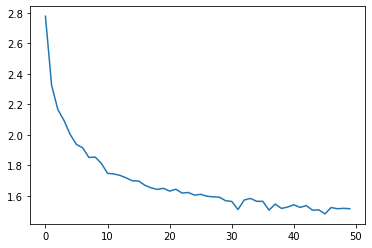

In [15]:
import matplotlib.pyplot as plt
plt.plot(all_losses)

# New Section

---

## Part 6: Generate output on a different dataset

---

**TODO:**

* Choose a textual dataset. Here are some [text datasets](https://www.kaggle.com/datasets?tags=14104-text+data%2C13205-text+mining) from Kaggle 

* Generate some decent looking results and evaluate your model's performance (say what it did well / not so well)

**DONE:**



In [16]:
file = unidecode.unidecode(open('./text_files/tiny_shakespeare.txt').read())
file_len = len(file)
print('file_len =', file_len)
print(random_chunk())

file_len = 1115394
ad still wear the crown,
I here resign my government to thee,
For thou art fortunate in all thy deeds.

WARWICK:
Your grace hath still been famed for virtuous;
And now may seem as wise as virtuous,
By 


In [0]:
n_epochs = 5000
print_every = 500
plot_every = 100
hidden_size = 200
n_layers = 1
lr = 0.001
 
decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

inp, target = random_training_set()
start = time.time()
all_losses = []
loss_avg = 0

In [18]:
for epoch in range(1, n_epochs + 1):
  loss_ = train(*random_training_set())       
  loss_avg += loss_

  if epoch % print_every == 0:
      print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, loss_))
      print(evaluate('Wh', 100), '\n')

  if epoch % plot_every == 0:
      all_losses.append(loss_avg / plot_every)
      loss_avg = 0

[157.45819664001465 (500 10%) 2.0287]
Why mant,
Why legeme I if ms the turngst Eyst fain save,
Wo france foancaried?
Well, unk, I fanten Hap 

[309.2087688446045 (1000 20%) 1.8170]
Whorstrane
she ford wimant mawst with you comen:
I way I comcoigh
lobhile of Rinows, I pare his sweart 

[460.45297741889954 (1500 30%) 1.7173]
Wherverd:
To prichil:
And comporing own dagile, Call deviton fries.

AmTIENNUS:
Boney nor resid it Nus 

[611.9716420173645 (2000 40%) 1.7874]
Wharr.

MERGAUCESTENC:
Manish
A do reme, son, though hath begwfand excuris.

Hearr that most sught;
Ih 

[764.0012674331665 (2500 50%) 1.5012]
Whird, Semb'd roubtle must, say'd bid paren's grean the world;
For this no you the gorns, and make hen 

[914.9174721240997 (3000 60%) 1.9378]
Whirs: homing gracial.

LUCEONE:
He have her myself o him stridged
And a partated one you not has thou 

[1066.4146196842194 (3500 70%) 1.4967]
Whenced,' of fine!
On? gave, and we will to-no murd, cannot with of Clempery.

GiLABETH:
Why, whore sh

In [19]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " I ", " ca", " G", " lo", " ra"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
#   all_characters.index(string[c])
  print(evaluate(start_strings[start], 200), '\n')

 wh
 whaft the right,
Look Romarch her redures,
And conselled comfort, man!

QUEEN WICHARD III:
IV courth, to a great lefe,
The king head, DiEkers' right, by the noble.

ELIO:
With worl'd, and me him, Peliev 

 ca
 cal when her it:
Come, your man dream,
If hear me, witwhe fell unto the would great butchio.
Fathem; and a lones fiesal vost kite pardon
but at and bury, of they slay take and with me the mejco.

HASCES 

 wh
 whoenger my father some firged
The Tibgeen enurn the bark, what
Heven at an her acion'sw awail-villain mistre
As Edwards I day, and thaunking from by sir?

MERCUTI:
The eittle hence: ask you'rownering;
 

 ca
 cate and brother.

BOLUSSTER:
Now, go? I have on your hunds too canst,
Your grows instance the cere!

TAUCLAGE:
Till of me, inisher's now tempera that hearth;
The prooutter,--
And for a touch in the dot 

 ra
 ral the poly atter-butch'd him noble countor.
Soval nogk, but dame! him hear them die;
Who Edwark burb it is gentle noble of Amath
Thou let need when dufte